[*********************100%%**********************]  1 of 1 completed


Selected features: ['Volume', 'Day', 'Month', 'Year', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'Lag_1', 'Lag_2']
MSE: 4.026661377622928
RMSE: 2.006654274563241
Feature Coefficients:
Feature: Volume, Coefficient: -0.11981144582934554
Feature: Day, Coefficient: 0.0040424140510140205
Feature: Month, Coefficient: 0.13137694048071813
Feature: Year, Coefficient: 0.3297420564323348
Feature: SMA_20, Coefficient: -44.364674001435574
Feature: SMA_50, Coefficient: -11.085390739762472
Feature: EMA_20, Coefficient: 73.73819602068069
Feature: EMA_50, Coefficient: 1.0705249404239847
Feature: Lag_1, Coefficient: 33.82692703561539
Feature: Lag_2, Coefficient: -9.395677331456707


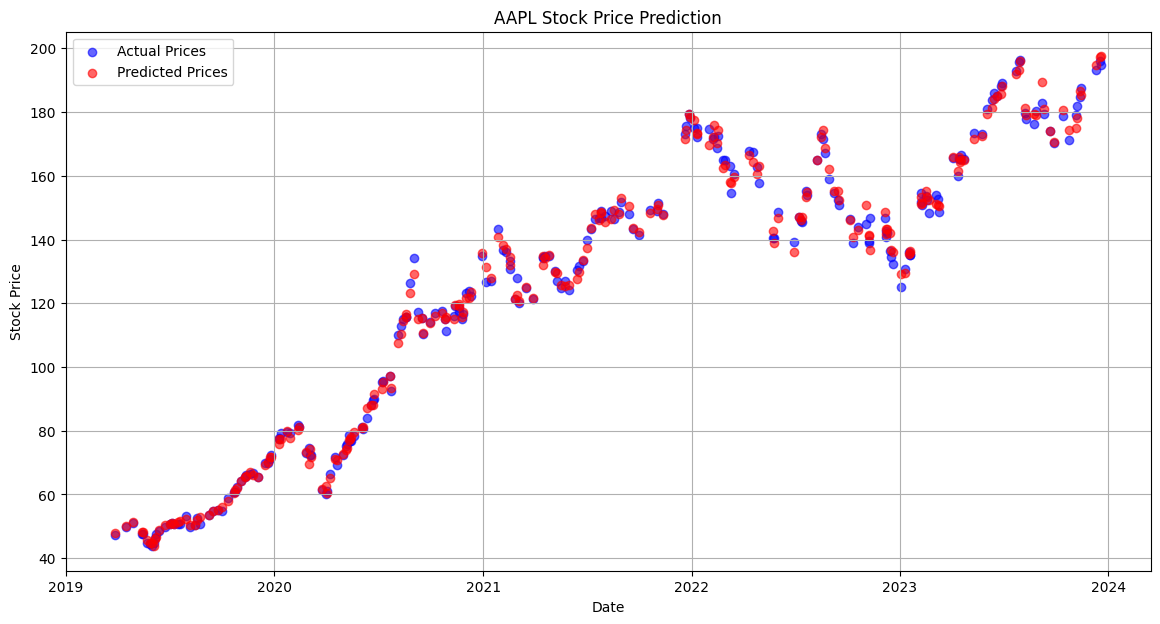

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

stock = 'AAPL'
data = yf.download(stock, start='2019-01-01', end='2024-01-01')

data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)
data.dropna(inplace=True)

features = data[['Volume', 'Day', 'Month', 'Year',
                 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'Lag_1', 'Lag_2']]
#features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day', 'Month', 'Year',
#                 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'Lag_1', 'Lag_2']]
target = data['Close']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

est = LinearRegression()
selector = RFE(est, n_features_to_select=13, step=1)
features_selected = selector.fit_transform(features_scaled, target)

selected_features = [features.columns[i] for i in range(len(features.columns)) if selector.support_[i]]
print("Selected features:", selected_features)

X_train, X_test, y_train, y_test = train_test_split(features_selected, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'MSE:',mse)
print(f'RMSE:',rmse)

print("Feature Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f'Feature: {feature}, Coefficient: {coef}')

plt.figure(figsize=(14, 7))

plt.scatter(y_test.index, y_test.values, label='Actual Prices', color='blue', alpha=0.6)

plt.scatter(y_test.index, predictions, label='Predicted Prices', color='red', alpha=0.6)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{stock} Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()